# Linear Regression

Machine learning is about using data to infer patterns.

Linear regression is the basic unit of Deep Learning. In fact personally I prefer to think of it as stacking linear regression modules.

Deep Learning has proven itself over and over again to be far superior to traditional machine learning techiques. It's strength comes from the fact that it can be scalable to large amounts of data. 

Some of the most impressive applications are in voice recognition, self driving cars and in chatbots.

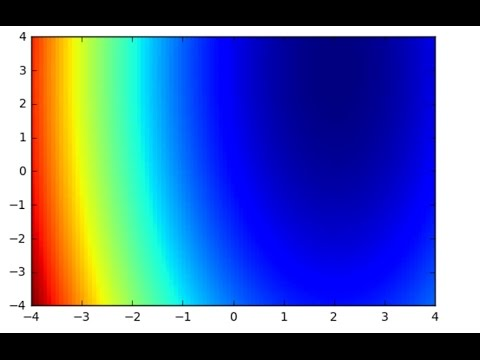

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("jpmGxOB2YPo")

In [2]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Consider the line $y=2x+3$. See below for a light introduction to plotting and numpy arrays. Numpy arrays are really important to understand. If you have experience with Matlab once you take out the `np.` part it should be familiar to the relevant Matlab function.

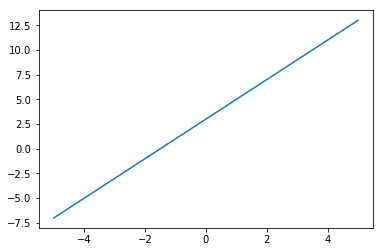

In [3]:
x = np.linspace(-5,5,num=100)
y = 2*x+3

plt.plot(x,y)
plt.show()

This is how you define a function in Python. Remember to return the value.

In [4]:
def f(w,b):
    """
    We will limit ourselves to a linear function
    """
    return w*x+b

def loss_function(w,b):
    """
    Loss function (squared error)
    Note that w and b are the ONLY variables
    """
    e = y - f(w,b)
    return np.mean(np.square(e))

## Find the function

Given the observation $x,y$ the goal is to find the best parameters, $w,b$ that fits the data. Ignore the fact that you can solve this as an equation. Most of the time the data isn't as linear or noiseless as what is being presented here.

The most naiive way of finding $w$ and $b$ is to do a grid search over $w$ and $b$ for the smallest loss function value. In this case the loss function is: $$\frac{1}{N}\sum_{i=1}^N \xi_i^2$$ where, $\xi_i = y_i - f(x_i|w,b)$ and $f(x_i|w,b)=wx_i+b$.

Another way of stating the above is that we need to find the best fitting function $f(x_i|w,b)$ such that we minimising the __loss function__ by varying $w$ and $b$. An illustration is shown below:

In [5]:
y

array([ -7.        ,  -6.7979798 ,  -6.5959596 ,  -6.39393939,
        -6.19191919,  -5.98989899,  -5.78787879,  -5.58585859,
        -5.38383838,  -5.18181818,  -4.97979798,  -4.77777778,
        -4.57575758,  -4.37373737,  -4.17171717,  -3.96969697,
        -3.76767677,  -3.56565657,  -3.36363636,  -3.16161616,
        -2.95959596,  -2.75757576,  -2.55555556,  -2.35353535,
        -2.15151515,  -1.94949495,  -1.74747475,  -1.54545455,
        -1.34343434,  -1.14141414,  -0.93939394,  -0.73737374,
        -0.53535354,  -0.33333333,  -0.13131313,   0.07070707,
         0.27272727,   0.47474747,   0.67676768,   0.87878788,
         1.08080808,   1.28282828,   1.48484848,   1.68686869,
         1.88888889,   2.09090909,   2.29292929,   2.49494949,
         2.6969697 ,   2.8989899 ,   3.1010101 ,   3.3030303 ,
         3.50505051,   3.70707071,   3.90909091,   4.11111111,
         4.31313131,   4.51515152,   4.71717172,   4.91919192,
         5.12121212,   5.32323232,   5.52525253,   5.72

In [6]:
x

array([-5.        , -4.8989899 , -4.7979798 , -4.6969697 , -4.5959596 ,
       -4.49494949, -4.39393939, -4.29292929, -4.19191919, -4.09090909,
       -3.98989899, -3.88888889, -3.78787879, -3.68686869, -3.58585859,
       -3.48484848, -3.38383838, -3.28282828, -3.18181818, -3.08080808,
       -2.97979798, -2.87878788, -2.77777778, -2.67676768, -2.57575758,
       -2.47474747, -2.37373737, -2.27272727, -2.17171717, -2.07070707,
       -1.96969697, -1.86868687, -1.76767677, -1.66666667, -1.56565657,
       -1.46464646, -1.36363636, -1.26262626, -1.16161616, -1.06060606,
       -0.95959596, -0.85858586, -0.75757576, -0.65656566, -0.55555556,
       -0.45454545, -0.35353535, -0.25252525, -0.15151515, -0.05050505,
        0.05050505,  0.15151515,  0.25252525,  0.35353535,  0.45454545,
        0.55555556,  0.65656566,  0.75757576,  0.85858586,  0.95959596,
        1.06060606,  1.16161616,  1.26262626,  1.36363636,  1.46464646,
        1.56565657,  1.66666667,  1.76767677,  1.86868687,  1.96

In [7]:
loss_function(2,2)

1.0

In [8]:
loss_function(2,3)

0.0

In [10]:
w_try, b_try = np.meshgrid(np.linspace(-5,5), np.linspace(-5,5))

In [11]:
w_try

array([[-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ],
       [-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ],
       [-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ],
       ..., 
       [-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ],
       [-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ],
       [-5.        , -4.79591837, -4.59183673, ...,  4.59183673,
         4.79591837,  5.        ]])

In [12]:
b_try

array([[-5.        , -5.        , -5.        , ..., -5.        ,
        -5.        , -5.        ],
       [-4.79591837, -4.79591837, -4.79591837, ..., -4.79591837,
        -4.79591837, -4.79591837],
       [-4.59183673, -4.59183673, -4.59183673, ..., -4.59183673,
        -4.59183673, -4.59183673],
       ..., 
       [ 4.59183673,  4.59183673,  4.59183673, ...,  4.59183673,
         4.59183673,  4.59183673],
       [ 4.79591837,  4.79591837,  4.79591837, ...,  4.79591837,
         4.79591837,  4.79591837],
       [ 5.        ,  5.        ,  5.        , ...,  5.        ,
         5.        ,  5.        ]])

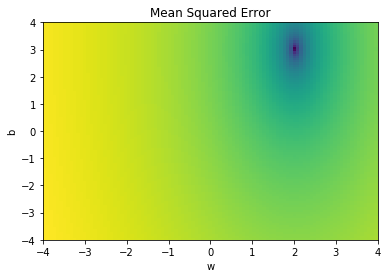

In [25]:
w_try = np.linspace(-4,4,num=100)
b_try = np.linspace(-4,4,num=100)

w_try, b_try = np.meshgrid(w_try,b_try)
e_obs = np.zeros((100,100))

for i in range(100):
    for j in range(100):
        e_obs[i,j] = loss_function(w_try[i,j],b_try[i,j])
        
plt.pcolormesh(w_try, b_try, np.log(e_obs)) #using log here helps visualise better, you may take it out
plt.xlabel('w')
plt.ylabel('b')
plt.title('Mean Squared Error')
plt.show()        

You can see that the error in the plot is minimised at $w=2$ and $b=3$.

In [26]:
e_obs.max()

355.06060606060601

In [27]:
e_obs.min()

0.0043879944910451526

Algorithms try to be a bit smarter by following the gradients to find the minimum. Remember we can only influence the error via the weights (and bias) `w,b`.

## Maths (optional - no really)
\begin{align}
\mathcal{L} & = \sum_{i=1}^N (y_i-f(x_i,w,b))^2 \\
\frac{\delta\mathcal{L}}{\delta w} & = \sum_{i=1}^N 2(y_i-f(x_i,w,b))\frac{\delta f(x_i,w,b)}{\delta w} \\ 
& = \sum_{i=1}^N 2\xi_i\frac{\delta f(x_i,w,b)}{\delta w}
\end{align}
where $\xi_i$ is the error term $y_i-f(x_i,w,b)$ and 
$$
\frac{\delta f(x_i,w,b)}{\delta w} = x_i
$$

Similar expression can be found for $\frac{\delta\mathcal{L}}{\delta b}$ (exercise).

Finally the weights can be updated as $w_{new} = w_{current} - \gamma \frac{\delta\mathcal{L}}{\delta w}$ where $\gamma$ is a learning rate between 0 and 1.

In [29]:
from sklearn.linear_model import LinearRegression

Scikit learn is another Machine Learning that is quite powerful on itself. However it may not scale to millions of data points same way that DL does.

## Noisy Data
We see how to find the weights using scikit learn below. However, the data isn't as perfect as before. We add a tiny bit of noise.

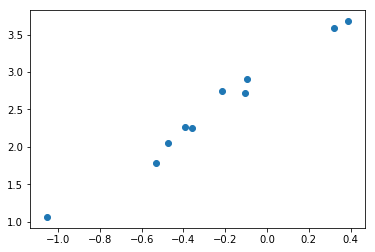

In [30]:
x = np.random.randn(10,1)
y = 2*x+3 + 0.1*np.random.randn(10,1)

plt.scatter(x,y)
plt.show()

In [31]:
x

array([[-0.53140766],
       [-0.39093887],
       [-1.05119687],
       [ 0.31837372],
       [-0.21698498],
       [-0.10631009],
       [ 0.386783  ],
       [-0.09697643],
       [-0.36057248],
       [-0.47221554]])

In [37]:
model = LinearRegression() # 
model.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [38]:
model.coef_

array([[ 1.89343643]])

In [39]:
model.intercept_

array([ 2.98122518])

In [40]:
model.predict(20)

array([[ 40.84995375]])

## Note:
1. `model.fit(...)` and `model.predict` will be two of the most important functions you will use all throughout. Worth remembering!

In [41]:
2*20+3

43

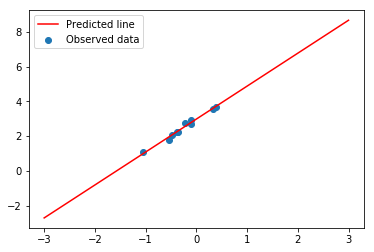

In [42]:
x_test = np.linspace(-3,3)
y_pred = model.predict(x_test[:,None])

plt.scatter(x,y)
plt.plot(x_test,y_pred,'r')
plt.legend(['Predicted line','Observed data'])
plt.show()

## A more complicated function
Remember that when we say linear regression it mean linear in the parmaters $w, b$ not $x$! See illustration below:

\begin{align}
y = b +w^T X \\
X = [x\quad x^2\quad x^3] \\
y = b +wx +w_2 x^2 +w_3 x^3 \\
\end{align}
The shapes of the matrices are:
- X = NxD matrix
- y = Nx1 vector
- w = Dx1 vector

Note in the example below that there is no $x^2$ term. i.e. it's coefficient is zero!

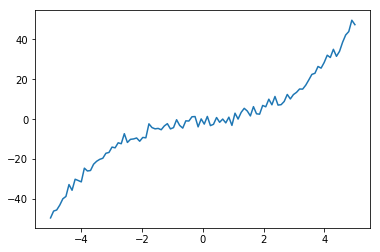

In [44]:
x = np.linspace(-5,5,num=100)[:,None]
y = -0.5 + 2.2*x +0.3*x**3+ 2*np.random.randn(100,1)

plt.plot(x,y)
plt.show()

In [45]:
x.shape

(100, 1)

In [46]:
x_new = np.hstack([x,x**2,x**3,x**4])
x_new.shape

(100, 4)

In [47]:
x.shape

(100, 1)

In [49]:
model = LinearRegression()
model.fit(x_new,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
model.coef_

array([[  1.96056458e+00,   6.42083377e-03,   3.17153449e-01,
          1.19352599e-03]])

## Note:
- The coefficient of $x^2$ and $x^4$ is really close to zero.

In [51]:
model.intercept_

array([-1.05542925])

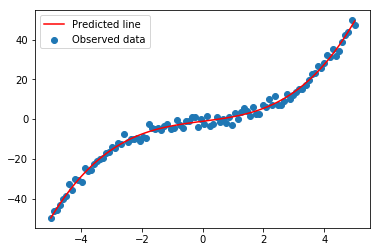

In [52]:
y_pred = model.predict(x_new)

plt.scatter(x,y)
plt.plot(x_new[:,0],y_pred,'r')
plt.legend(['Predicted line','Observed data'])
plt.show()

In [53]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4,include_bias=False)
x_new2 = poly.fit_transform(x)
x_new2[:2]

array([[  -5.        ,   25.        , -125.        ,  625.        ],
       [  -4.8989899 ,   24.00010203, -117.57625742,  576.00489747]])

In [54]:
x_new.shape

(100, 4)

In [55]:
x_new[:2]

array([[  -5.        ,   25.        , -125.        ,  625.        ],
       [  -4.8989899 ,   24.00010203, -117.57625742,  576.00489747]])